## Modelos para la detección de Lesión Renal Aguda Postoperatoria

### Librerías

In [29]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [30]:
#Clonar repositorio
!git clone https://github.com/danielfce01/Monografia.git

fatal: destination path 'Monografia' already exists and is not an empty directory.


### Conjuntos de datos

#### df_aki

Conjunto de datos del trabajo original :

Incidencia y factores de riesgo de Lesión Renal Aguda en cirugía no cardiovascular en un Hospital Universitario de Medellín, Colombia

Contiene 488 registros

Problema : marcado desbalance en la variable target lra (lesion renal aguda)

In [31]:
df_aki = pd.read_excel('/content/Monografia/data_final_balanceada.xlsx')
df_aki.head()

,edad,dm,hta,ieca,asa,enfermedad_renal_cronica,creatinina_basal,sepsis,choque_hipovolemico_,cirugia_vascular,prioridad_urgente,lra
0,75,0,0,0,3,0,0.76,0,0,0,0,0
1,71,1,1,0,3,0,0.82,1,0,0,0,0
2,66,1,1,1,3,0,0.69,0,1,0,1,1
3,42,0,0,0,1,0,0.69,0,0,0,1,0
4,88,1,1,0,3,0,0.83,0,0,0,0,0


In [32]:
df_aki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      489 non-null    int64  
 1   dm                        489 non-null    int64  
 2   hta                       489 non-null    int64  
 3   ieca                      489 non-null    int64  
 4   asa                       489 non-null    int64  
 5   enfermedad_renal_cronica  489 non-null    int64  
 6   creatinina_basal          489 non-null    float64
 7   sepsis                    489 non-null    int64  
 8   choque_hipovolemico_      489 non-null    int64  
 9   cirugia_vascular          489 non-null    int64  
 10  prioridad_urgente         489 non-null    int64  
 11  lra                       489 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 46.0 KB


In [33]:
print(df_aki['lra'].value_counts())

lra
0    395
1     94
Name: count, dtype: int64


In [34]:
df_aki['asa'] = df_aki['asa'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})
display(df_aki.head())

,edad,dm,hta,ieca,asa,enfermedad_renal_cronica,creatinina_basal,sepsis,choque_hipovolemico_,cirugia_vascular,prioridad_urgente,lra
0,75,0,0,0,1,0,0.76,0,0,0,0,0
1,71,1,1,0,1,0,0.82,1,0,0,0,0
2,66,1,1,1,1,0,0.69,0,1,0,1,1
3,42,0,0,0,0,0,0.69,0,0,0,1,0
4,88,1,1,0,1,0,0.83,0,0,0,0,0


####df_mimic


In [35]:
df_mimic = pd.read_csv('/content/Monografia/1710 ap_aki_features.csv')
df_mimic.head()

,subject_id,hadm_id,stay_id,intime,outtime,edad,gender,race,admission_type,insurance,...,aki_scr_stage,aki_uo,aki_7d,glucose_mean_24h,urine_24h_ml,intake_24h_ml,output_24h_ml,balance_hidrico_24h_ml,peso_kg,balance_hidrico_24h_mlkg
0,10004606,29242151,30213599,2159-02-20 16:10:03,2159-02-25 20:09:14,64,F,WHITE,OBSERVATION ADMIT,Other,...,NaN,0,0,131.000000,NaN,5851.571321,2215.0,3636.571321,NaN,NaN
1,10007795,28477357,31921355,2136-04-22 18:01:13,2136-04-23 19:13:58,53,F,WHITE,URGENT,Medicare,...,3.0,0,1,133.000000,NaN,2492.500023,5900.0,-3407.499977,NaN,NaN
2,10012206,23961896,37675714,2127-07-04 02:08:00,2127-07-04 15:52:22,45,M,WHITE,OBSERVATION ADMIT,Other,...,NaN,0,0,108.000000,NaN,2417.583356,1525.0,892.583356,NaN,NaN
3,10017531,21095812,32136798,2159-12-26 20:14:53,2160-02-04 16:23:00,64,M,WHITE,URGENT,Other,...,3.0,0,1,207.666667,NaN,2948.151587,745.0,2203.151587,NaN,NaN
4,10017531,22580355,35526828,2159-09-22 19:30:55,2159-10-24 14:57:16,64,M,WHITE,URGENT,Other,...,1.0,0,1,202.333333,NaN,10595.584131,1295.0,9300.584131,NaN,NaN


In [36]:
df_mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                1069 non-null   int64  
 1   hadm_id                   1069 non-null   int64  
 2   stay_id                   1069 non-null   int64  
 3   intime                    1069 non-null   object 
 4   outtime                   1069 non-null   object 
 5   edad                      1069 non-null   int64  
 6   gender                    1069 non-null   object 
 7   race                      1069 non-null   object 
 8   admission_type            1069 non-null   object 
 9   insurance                 1069 non-null   object 
 10  first_careunit            1069 non-null   object 
 11  dm                        1069 non-null   int64  
 12  hta                       1069 non-null   int64  
 13  enfermedad_renal_cronica  1069 non-null   int64  
 14  sepsis  

In [37]:
df_mimic = df_mimic[['edad', 'dm', 'hta', 'enfermedad_renal_cronica', 'sepsis', 'choque_hipovolemico_', 'ieca', 'asa', 'creatinina_basal', 'aki_7d']]
df_mimic = df_mimic.rename(columns={'aki_7d': 'lra'})
display(df_mimic.head())

,edad,dm,hta,enfermedad_renal_cronica,sepsis,choque_hipovolemico_,ieca,asa,creatinina_basal,lra
0,64,0,1,0,0,0,1,0,1.3,0
1,53,0,1,0,0,0,0,0,0.6,1
2,45,1,1,0,0,0,0,0,1.7,0
3,64,1,1,0,0,0,0,1,1.2,1
4,64,1,1,0,0,0,0,0,1.7,1


In [38]:
# Imputar valores faltantes en creatinina_basal con la media
df_mimic["creatinina_basal"].fillna(df_mimic["creatinina_basal"].mean(), inplace=True)

/tmp/ipython-input-2185084524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mimic["creatinina_basal"].fillna(df_mimic["creatinina_basal"].mean(), inplace=True)


In [39]:
df_mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1069 non-null   int64  
 1   dm                        1069 non-null   int64  
 2   hta                       1069 non-null   int64  
 3   enfermedad_renal_cronica  1069 non-null   int64  
 4   sepsis                    1069 non-null   int64  
 5   choque_hipovolemico_      1069 non-null   int64  
 6   ieca                      1069 non-null   int64  
 7   asa                       1069 non-null   int64  
 8   creatinina_basal          1069 non-null   float64
 9   lra                       1069 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 83.6 KB


In [40]:
print(df_mimic['lra'].value_counts())

lra
1    580
0    489
Name: count, dtype: int64


####df_udaki

In [41]:
df_mimic_2 = df_mimic.copy()

In [42]:
df_mimic_2['cirugia_vascular'] = 0
df_mimic_2['prioridad_urgente'] = 0

In [15]:
df_udaki = pd.concat([df_aki, df_mimic_2])
df_udaki.head()

,edad,dm,hta,ieca,asa,enfermedad_renal_cronica,creatinina_basal,sepsis,choque_hipovolemico_,cirugia_vascular,prioridad_urgente,lra
0,75,0,0,0,1,0,0.76,0,0,0,0,0
1,71,1,1,0,1,0,0.82,1,0,0,0,0
2,66,1,1,1,1,0,0.69,0,1,0,1,1
3,42,0,0,0,0,0,0.69,0,0,0,1,0
4,88,1,1,0,1,0,0.83,0,0,0,0,0


In [43]:
df_udaki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, 0 to 1068
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1558 non-null   int64  
 1   dm                        1558 non-null   int64  
 2   hta                       1558 non-null   int64  
 3   ieca                      1558 non-null   int64  
 4   asa                       1558 non-null   int64  
 5   enfermedad_renal_cronica  1558 non-null   int64  
 6   creatinina_basal          1558 non-null   float64
 7   sepsis                    1558 non-null   int64  
 8   choque_hipovolemico_      1558 non-null   int64  
 9   cirugia_vascular          1558 non-null   int64  
 10  prioridad_urgente         1558 non-null   int64  
 11  lra                       1558 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 158.2 KB


In [44]:
print(df_udaki['lra'].value_counts())

lra
0    884
1    674
Name: count, dtype: int64


**Gradient Boosting con SMOTE en UDAKI**

In [50]:
df_udaki_smote = df_udaki.copy()

🚀 APLICANDO SMOTE A DF_UDAKI CON SUS HIPERPARÁMETROS ÓPTIMOS
APLICACIÓN DE SMOTE EN DF_UDAKI
Distribución original - Entrenamiento: [707 539]
Distribución original - Test: [177 135]
Proporción clase 1 en entrenamiento: 0.433

Distribución después de SMOTE - Entrenamiento: [707 707]
Proporción clase 1 después de SMOTE: 0.500

BÚSQUEDA DE MEJOR UMBRAL
Umbral 0.2: F1=0.6106, Recall=0.9407, Precision=0.4520, Accuracy=0.4808
Umbral 0.3: F1=0.6186, Recall=0.8889, Precision=0.4743, Accuracy=0.5256
Umbral 0.4: F1=0.6087, Recall=0.7778, Precision=0.5000, Accuracy=0.5673
Umbral 0.5: F1=0.5804, Recall=0.6148, Precision=0.5497, Accuracy=0.6154
Umbral 0.6: F1=0.5182, Recall=0.4222, Precision=0.6706, Accuracy=0.6603

🎯 MEJOR UMBRAL ENCONTRADO: 0.3 (F1=0.6186)

RESULTADOS CON MEJOR UMBRAL
Accuracy: 0.5256
Precision: 0.4743
Recall: 0.8889
F1-Score: 0.6186

Matriz de Confusión:
[[ 44 133]
 [ 15 120]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.

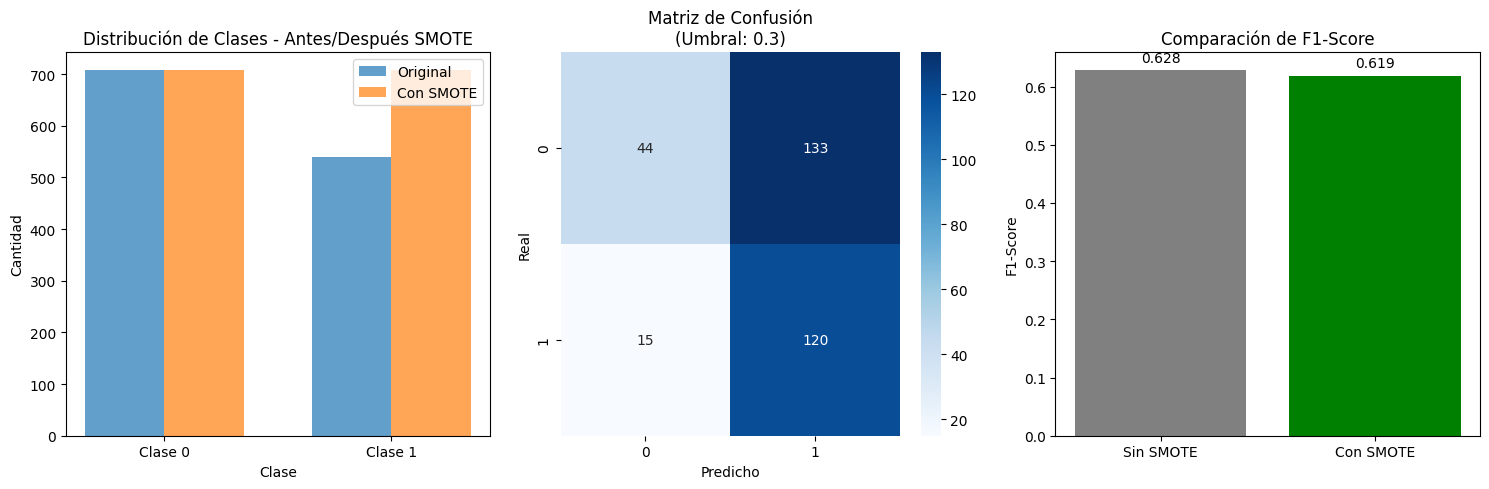


✅ EJECUCIÓN COMPLETADA - RESUMEN
Mejor umbral: 0.3
F1-Score: 0.6186
Recall: 0.8889
Precision: 0.4743
Mejora en F1 con SMOTE: -0.0092


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

def aplicar_smote_df_udaki(df, target_col='lra', test_size=0.2, random_state=42):
    """
    Aplicar SMOTE en df_udaki usando los hiperparámetros óptimos específicos de df_udaki
    """

    # 1. Separar características y variable objetivo
    X = df.drop(columns=[target_col]) # Changed from df_udaki_smote to df
    y = df[target_col] # Changed from df_udaki_smote to df

    print("=" * 60)
    print("APLICACIÓN DE SMOTE EN DF_UDAKI")
    print("=" * 60)

    # 2. División train-test (ANTES de SMOTE)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"Distribución original - Entrenamiento: {np.bincount(y_train)}")
    print(f"Distribución original - Test: {np.bincount(y_test)}")
    print(f"Proporción clase 1 en entrenamiento: {y_train.mean():.3f}")

    # 3. Aplicar SMOTE solo al conjunto de entrenamiento
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print(f"\nDistribución después de SMOTE - Entrenamiento: {np.bincount(y_train_smote)}")
    print(f"Proporción clase 1 después de SMOTE: {y_train_smote.mean():.3f}")

    # 4. Entrenar modelo Gradient Boosting con hiperparámetros óptimos de df_udaki
    gb_model = GradientBoostingClassifier(
        subsample=0.8,
        n_estimators=400,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.9,
        max_depth=4,
        loss='exponential',
        learning_rate=0.01,
        random_state=random_state
    )

    # Entrenar con datos balanceados por SMOTE
    gb_model.fit(X_train_smote, y_train_smote)

    # 5. Predicciones y evaluación
    y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

    # 6. Encontrar el mejor umbral (usando el mismo enfoque que antes)
    best_threshold = 0.3  # Inicializamos con el umbral óptimo original
    best_f1 = 0
    results = []

    print("\n" + "=" * 40)
    print("BÚSQUEDA DE MEJOR UMBRAL")
    print("=" * 40)

    for threshold in [0.2, 0.3, 0.4, 0.5, 0.6]:
        y_pred = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'threshold': threshold,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy
        })

        print(f"Umbral {threshold}: F1={f1:.4f}, Recall={recall:.4f}, Precision={precision:.4f}, Accuracy={accuracy:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"\n🎯 MEJOR UMBRAL ENCONTRADO: {best_threshold} (F1={best_f1:.4f})")

    # 7. Evaluar con el mejor umbral
    y_pred_best = (y_pred_proba >= best_threshold).astype(int)

    print("\n" + "=" * 40)
    print("RESULTADOS CON MEJOR UMBRAL")
    print("=" * 40)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred_best)
    print("\nMatriz de Confusión:")
    print(cm)

    # Reporte de clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_best))

    # 8. Comparación con modelo sin SMOTE (usando los mismos hiperparámetros)
    print("\n" + "=" * 50)
    print("COMPARACIÓN: CON SMOTE vs SIN SMOTE")
    print("=" * 50)

    # Modelo sin SMOTE
    gb_model_no_smote = GradientBoostingClassifier(
        subsample=0.8,
        n_estimators=400,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.9,
        max_depth=4,
        loss='exponential',
        learning_rate=0.01,
        random_state=random_state
    )

    gb_model_no_smote.fit(X_train, y_train)
    y_pred_proba_no_smote = gb_model_no_smote.predict_proba(X_test)[:, 1]
    y_pred_no_smote = (y_pred_proba_no_smote >= best_threshold).astype(int)

    f1_no_smote = f1_score(y_test, y_pred_no_smote)
    recall_no_smote = recall_score(y_test, y_pred_no_smote)
    precision_no_smote = precision_score(y_test, y_pred_no_smote)
    accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)

    print(f"📊 SIN SMOTE - F1: {f1_no_smote:.4f}, Recall: {recall_no_smote:.4f}, Precision: {precision_no_smote:.4f}, Accuracy: {accuracy_no_smote:.4f}")
    print(f"📊 CON SMOTE  - F1: {best_f1:.4f}, Recall: {recall_score(y_test, y_pred_best):.4f}, Precision: {precision_score(y_test, y_pred_best):.4f}, Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
    print(f"📈 Mejora en F1: {best_f1 - f1_no_smote:.4f}")

    # 9. Visualización
    plt.figure(figsize=(15, 5))

    # Subplot 1: Distribución de clases
    plt.subplot(1, 3, 1)
    counts_original = [np.sum(y_train == 0), np.sum(y_train == 1)]
    counts_smote = [np.sum(y_train_smote == 0), np.sum(y_train_smote == 1)]

    x = np.arange(2)
    width = 0.35

    plt.bar(x - width/2, counts_original, width, label='Original', alpha=0.7)
    plt.bar(x + width/2, counts_smote, width, label='Con SMOTE', alpha=0.7)
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.title('Distribución de Clases - Antes/Después SMOTE')
    plt.xticks(x, ['Clase 0', 'Clase 1'])
    plt.legend()

    # Subplot 2: Matriz de confusión
    plt.subplot(1, 3, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión\n(Umbral: {best_threshold})')
    plt.ylabel('Real')
    plt.xlabel('Predicho')

    # Subplot 3: Comparación F1-score
    plt.subplot(1, 3, 3)
    comparison_data = ['Sin SMOTE', 'Con SMOTE']
    f1_scores = [f1_no_smote, best_f1]

    plt.bar(comparison_data, f1_scores, color=['gray', 'green'])
    plt.title('Comparación de F1-Score')
    plt.ylabel('F1-Score')

    for i, v in enumerate(f1_scores):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # 10. Retornar resultados importantes
    return {
        'modelo': gb_model,
        'mejor_umbral': best_threshold,
        'X_train_smote': X_train_smote,
        'y_train_smote': y_train_smote,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred_proba': y_pred_proba,
        'y_pred_proba_no_smote': y_pred_proba_no_smote, # ADDED THIS LINE
        'metricas': {
            'accuracy': accuracy_score(y_test, y_pred_best),
            'precision': precision_score(y_test, y_pred_best),
            'recall': recall_score(y_test, y_pred_best),
            'f1_score': best_f1
        },
        'comparacion_smote': {
            'f1_sin_smote': f1_no_smote,
            'f1_con_smote': best_f1,
            'mejora_f1': best_f1 - f1_no_smote,
            'recall_sin_smote': recall_no_smote,
            'recall_con_smote': recall_score(y_test, y_pred_best),
            'precision_sin_smote': precision_no_smote,
            'precision_con_smote': precision_score(y_test, y_pred_best)
        }
    }

# EJECUCIÓN
if __name__ == "__main__":
    try:
        print("🚀 APLICANDO SMOTE A DF_UDAKI CON SUS HIPERPARÁMETROS ÓPTIMOS")
        resultados = aplicar_smote_df_udaki(df_udaki)

        print("\n" + "=" * 60)
        print("✅ EJECUCIÓN COMPLETADA - RESUMEN")
        print("=" * 60)
        print(f"Mejor umbral: {resultados['mejor_umbral']}")
        print(f"F1-Score: {resultados['metricas']['f1_score']:.4f}")
        print(f"Recall: {resultados['metricas']['recall']:.4f}")
        print(f"Precision: {resultados['metricas']['precision']:.4f}")
        print(f"Mejora en F1 con SMOTE: {resultados['comparacion_smote']['mejora_f1']:.4f}")

    except Exception as e:
        print(f"❌ Error: {e}")
        print("Asegúrate de que df_udaki esté correctamente definido")

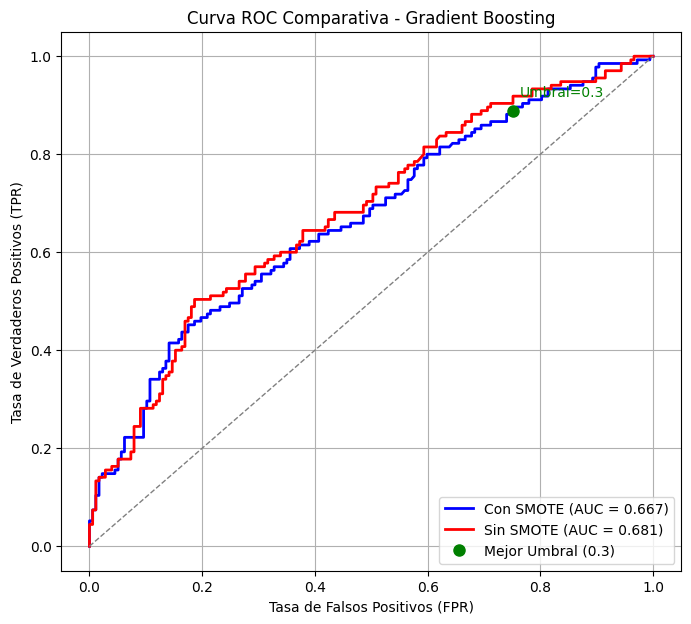

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Extraer las variables necesarias del diccionario 'resultados'
y_test = resultados['y_test']
y_pred_proba_smote = resultados['y_pred_proba'] # Renamed for clarity
y_pred_proba_no_smote = resultados['y_pred_proba_no_smote'] # Now available
best_threshold = resultados['mejor_umbral'] # Get the best threshold

plt.figure(figsize=(8, 7))

# --- Curva ROC para el modelo con SMOTE ---
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
plt.plot(fpr_smote, tpr_smote, color='blue', lw=2, label=f'Con SMOTE (AUC = {roc_auc_smote:.3f})')

# --- Curva ROC para el modelo sin SMOTE ---
fpr_no_smote, tpr_no_smote, _ = roc_curve(y_test, y_pred_proba_no_smote)
roc_auc_no_smote = roc_auc_score(y_test, y_pred_proba_no_smote)
plt.plot(fpr_no_smote, tpr_no_smote, color='red', lw=2, label=f'Sin SMOTE (AUC = {roc_auc_no_smote:.3f})')

# --- Resaltar el mejor umbral (para el modelo con SMOTE) ---
# Encontrar el punto más cercano al mejor umbral en la curva con SMOTE
# Esto es una aproximación, ya que 'thresholds' contiene todos los umbrales usados para la curva, no solo el 'best_threshold' de F1.
# Para una marcación precisa, se necesita calcular el FPR y TPR para el 'best_threshold' específico.
# Una forma simple es encontrar el FPR y TPR para el umbral que se usó para la evaluación final.

# Para el umbral óptimo (del modelo CON SMOTE):
y_pred_best_smote = (y_pred_proba_smote >= best_threshold).astype(int)
cm_best_smote = confusion_matrix(y_test, y_pred_best_smote)
tn, fp, fn, tp = cm_best_smote.ravel()
tpr_at_best_threshold = tp / (tp + fn)
fpr_at_best_threshold = fp / (fp + tn)

plt.plot(fpr_at_best_threshold, tpr_at_best_threshold, 'o', color='green', markersize=8, label=f'Mejor Umbral ({best_threshold})')
plt.annotate(f'Umbral={best_threshold}',
             (fpr_at_best_threshold, tpr_at_best_threshold),
             textcoords="offset points", xytext=(5,10),
             ha='left', color='green')

plt.plot([0,1], [0,1], color='gray', linestyle='--', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()